## Linear Autoencoder

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense , Input
import numpy as np
import matplotlib.pyplot as plt 
tf.__version__

'2.11.0'

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0]

5

In [8]:
np.random.randint(0,59999)

28352

9

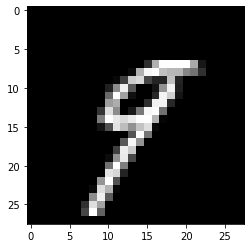

In [9]:
i = np.random.randint(0,59999)
plt.imshow(X_train[i], cmap= 'gray');
y_train[i]

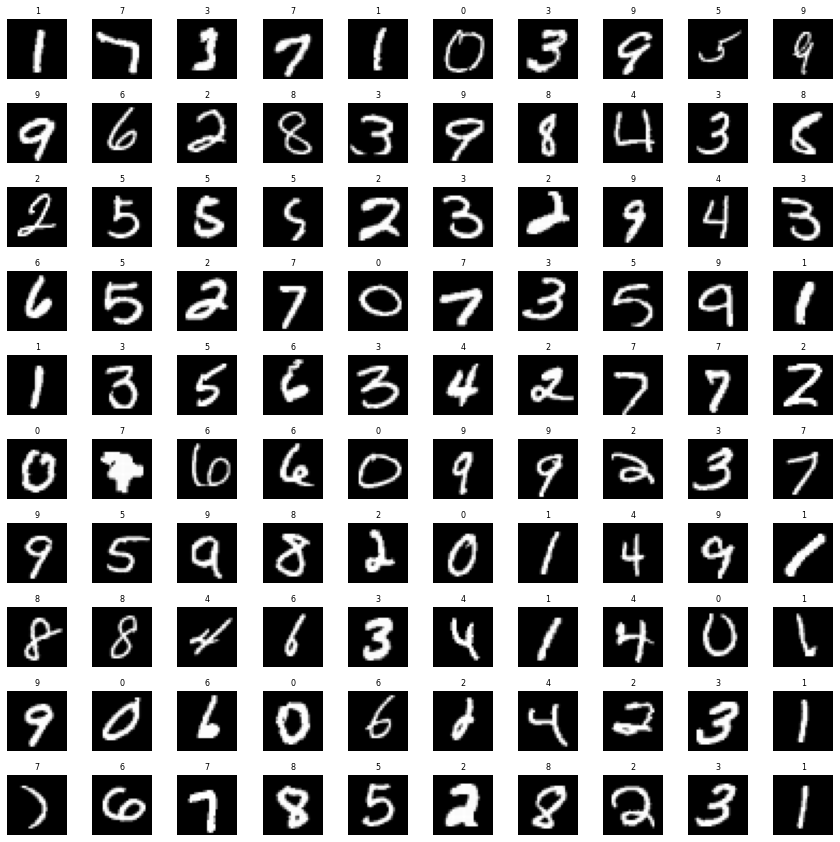

In [10]:
width = 10
height = 10
fig,axes = plt.subplots(height,width,figsize = (15,15))
# print(axes.shape)
# print(fig)
axes = axes.ravel() #change from 10*10 matrix to 100 vector
for i in np.arange(0,width*height):
  index =np.random.randint(0,59999)
  axes[i].imshow(X_train[index] ,cmap='gray')
  axes[i].set_title(y_train[index],fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [11]:
X_train[0].min(),X_train[0].max()

(0, 255)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train[0].min(),X_train[0].max()

(0.0, 1.0)

In [14]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [15]:
X_train.shape[0]

60000

In [16]:
#since first layer is the flatten layer with all the pixels we need the make the 28*28 matrix as single dimension
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_train.shape

(60000, 784)

In [17]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
X_test.shape

(10000, 784)

In [18]:
 #784 - 128 - 64 - 32 - 64 - 128- 784

In [19]:
autoencoder = Sequential()

#encode
autoencoder.add(Dense(units = 128, activation ='relu', input_dim = 784))
autoencoder.add(Dense(units= 64,activation = 'relu'))
autoencoder.add(Dense(units= 32,activation = 'relu')) #encoded image

#decode
autoencoder.add(Dense(units = 64, activation ='relu'))
autoencoder.add(Dense(units= 128,activation = 'relu'))
autoencoder.add(Dense(units= 784,activation = 'sigmoid')) 


In [20]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [21]:
autoencoder.compile(optimizer = 'Adam', loss='binary_crossentropy',metrics = ['accuracy'])

In [22]:
autoencoder.fit(X_train,X_train,epochs =15)

Epoch 1/15
1875/1875 [==============================] - 12s 3ms/step - loss: 0.1548 - accuracy: 0.0092
Epoch 2/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1118 - accuracy: 0.0108
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1032 - accuracy: 0.0105
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0983 - accuracy: 0.0121
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0949 - accuracy: 0.0124
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0927 - accuracy: 0.0121
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0912 - accuracy: 0.0121
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0902 - accuracy: 0.0129
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0895 - accuracy: 0.0131
Epoch 10/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.08

In [23]:
autoencoder.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_input')>

In [24]:
encoder = Model(inputs = autoencoder.input , outputs = autoencoder.get_layer('dense_2').output)

In [25]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


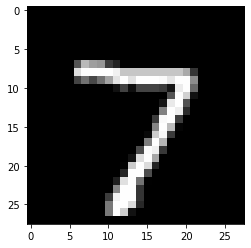

In [26]:
plt.imshow(X_test[0].reshape(28,28),cmap ='gray')

In [27]:
X_test[0].shape

(784,)

In [28]:
X_test.shape

(10000, 784)

In [29]:
X_test[0].reshape(1,-1).shape

(1, 784)

In [30]:
encoded_image=encoder.predict(X_test[0].reshape(1,-1))

1/1 [==============================] - 0s 84ms/step


In [31]:
encoded_image

array([[5.327947 , 4.65479  , 5.1567802, 8.219917 , 0.       , 4.9635777,
        2.2924778, 9.086875 , 0.       , 3.36114  , 3.5500588, 5.0184765,
        0.       , 7.1304517, 2.8662956, 9.462464 , 7.1365156, 3.822468 ,
        5.5827165, 7.793204 , 0.       , 0.       , 0.       , 9.526618 ,
        9.59     , 7.3374853, 9.259301 , 0.       , 5.732103 , 6.0959387,
        0.       , 8.007976 ]], dtype=float32)

In [32]:
encoded_image.shape

(1, 32)

In [33]:
8*4

32

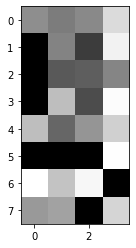

In [34]:
plt.imshow(encoded_image.reshape(8,4),cmap='gray')

In [35]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [38]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3] #Accessing the layer with the index instead of name
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
decoder = Model(inputs=input_layer_decoder,outputs=decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder)))) #connecting all the layers
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [39]:
decoded_image = decoder.predict(encoded_image)

1/1 [==============================] - 0s 61ms/step


In [40]:
decoded_image

array([[7.37916672e-12, 9.86265149e-12, 3.20060927e-12, 1.73751187e-11,
        2.59040033e-12, 1.49952099e-11, 1.68322496e-12, 2.06586549e-12,
        1.14359451e-11, 1.63481485e-11, 2.35977405e-12, 3.37815149e-12,
        9.39480224e-18, 3.53118880e-23, 1.26547715e-18, 2.17285838e-14,
        8.64863563e-12, 9.40714954e-12, 6.24348663e-12, 3.38947186e-12,
        1.51988112e-12, 1.32393543e-12, 4.02260482e-11, 1.66018176e-12,
        2.84393620e-11, 1.13090735e-11, 4.59418484e-12, 7.05521308e-13,
        3.71368518e-12, 5.14030919e-12, 4.21630911e-13, 3.46729867e-11,
        2.79353944e-15, 4.38524407e-14, 1.91161670e-11, 4.87045404e-11,
        5.17137169e-13, 5.76465755e-14, 1.11941608e-17, 2.50045416e-17,
        1.41715028e-15, 2.82007940e-17, 2.73784989e-20, 6.81804137e-20,
        3.85000282e-19, 5.17847272e-19, 1.15460418e-21, 9.21738017e-25,
        6.63589399e-24, 7.43166592e-20, 8.60158054e-17, 4.95098720e-14,
        5.91462296e-11, 1.34499035e-11, 8.87498582e-12, 2.950332

In [41]:
decoded_image.shape

(1, 784)

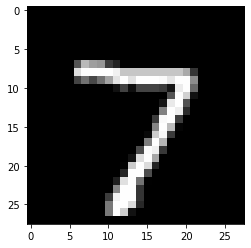

In [44]:
plt.imshow(X_test[0].reshape(28,28),cmap='gray')

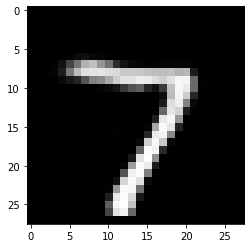

In [45]:
plt.imshow(decoded_image.reshape(28,28),cmap='gray')

In [46]:
X_test.shape[0]

10000

1/1 [==============================] - 0s 23ms/step


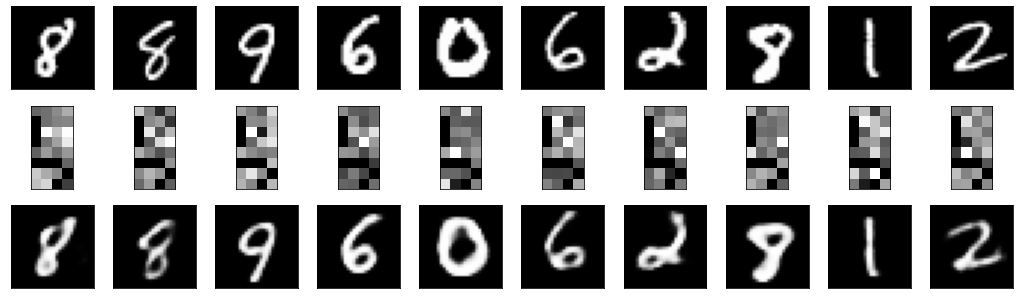

In [55]:
n_images = 10
test_images = np.random.randint(0,X_test.shape[0] - 1,size=n_images)
# print(test_images)
plt.figure(figsize = (18,18))
for i,image_index in enumerate(test_images):
  # print(i,image_index)
  ax=plt.subplot(10,10,i+1)
  plt.imshow(X_test[image_index].reshape(28,28),cmap = 'gray')
  plt.xticks(())
  plt.yticks(())

  #coded images
  ax=plt.subplot(10,10,i+1+n_images)
  encoded_image = encoder.predict(X_test[image_index].reshape(1,-1))
  plt.imshow(encoded_image.reshape(8,4),cmap ='gray')
  plt.xticks(())
  plt.yticks(())

  #decodedimages
  ax=plt.subplot(10,10,i+1+n_images*2) #last parameter is changed to avoid the error of duplicate indes
  plt.imshow(decoder.predict(encoded_image).reshape(28,28),cmap ='gray')
  plt.xticks(())
  plt.yticks(())